In [5]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd

from datafold.appfold import EDMD
from datafold.dynfold import DMDFull
from datafold.dynfold.transform import TSCPolynomialFeatures, TSCApplyLambdas
from datafold.pcfold import TSCDataFrame

import solvers
import utils
import generators

def get_torus_evo_krylov(initial_state=(0,0), num_col=500):
    return utils.generate_krylov(generators.two_torus_evolution_function, generators.full_state_observable, initial_state, num_col)

Xt shape(500, 2)
G (9, 9)
A (9, 9)
K (9, 9)
Eigenvalue
[0.19+0.98j 0.51+0.86j 0.77+0.64j 0.94+0.34j 0.97+0.25j 1.  -0.j
 0.98+0.19j 0.99+0.13j 1.  +0.06j]


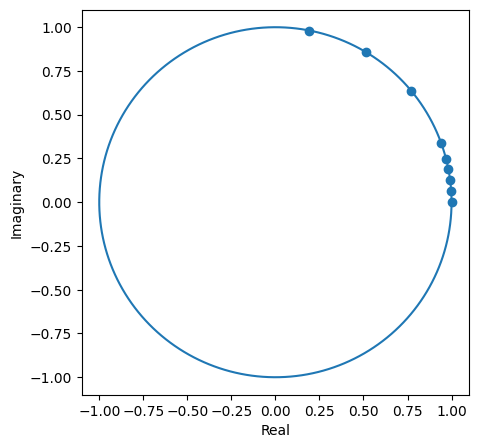

In [6]:
degree = 5
Xt = get_torus_evo_krylov()
print(f"Xt shape{Xt.shape}")
Kx = solvers.EDMD_matrix_representation(Xt, degree=degree)
utils.round_complex_matrix(Kx)
utils.apply_arnoldi_and_plot(Kx, decimal=2)

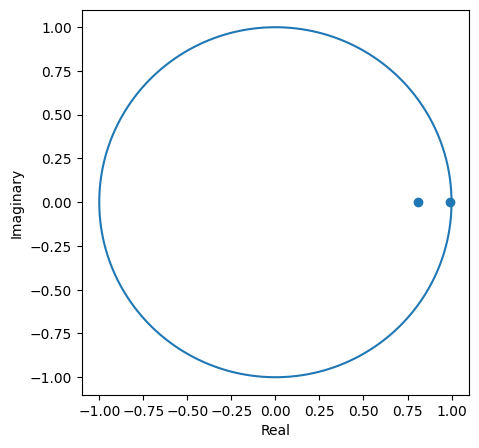

In [7]:
Xt_df = pd.DataFrame(Xt)
tsc_data = TSCDataFrame.from_single_timeseries(Xt_df)
dmd = DMDFull().fit(X=tsc_data, store_system_matrix=True)
dmd_values = dmd.predict(tsc_data.initial_states(), time_values=None)

utils.plot_complex_on_unit_circle(dmd.eigenvalues_)

shape of Koopman matrix: 6 x 6


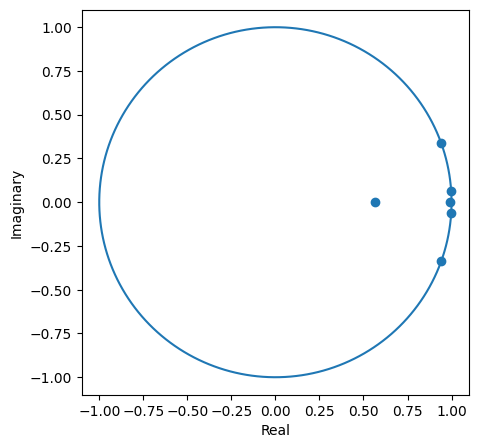

In [8]:
dict_step = [
    (
        "lambda",
        TSCApplyLambdas(lambdas=[np.sin, np.cos]),
    )
]
Xt_df = pd.DataFrame(Xt)
tsc_data = TSCDataFrame.from_single_timeseries(Xt_df)

edmd_lambda = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=tsc_data, dmd__store_system_matrix=True)
edmd_lambda_values = edmd_lambda.predict(tsc_data.initial_states())
len_koopman_matrix = len(edmd_lambda.named_steps["dmd"].eigenvectors_right_)
print(f"shape of Koopman matrix: {len_koopman_matrix} x {len_koopman_matrix}")
utils.plot_complex_on_unit_circle(edmd_lambda.named_steps["dmd"].eigenvalues_)

shape of Koopman matrix: 20 x 20


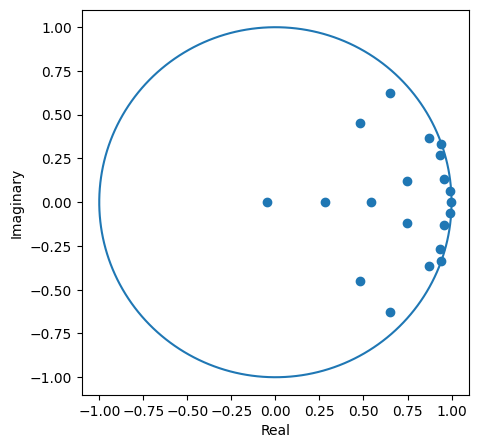

In [9]:
degree = 5
dict_step = [
    (
        "polynomial",
        TSCPolynomialFeatures(degree=degree),
    )
]
Xt_df = pd.DataFrame(Xt)
tsc_data = TSCDataFrame.from_single_timeseries(Xt_df)

edmd_poly = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=tsc_data, dmd__store_system_matrix=True)
edmd_poly_values = edmd_poly.predict(tsc_data.initial_states())
len_koopman_matrix = len(edmd_poly.named_steps["dmd"].eigenvectors_right_)
print(f"shape of Koopman matrix: {len_koopman_matrix} x {len_koopman_matrix}")
utils.plot_complex_on_unit_circle(edmd_poly.named_steps["dmd"].eigenvalues_)